# Import libraries

In [45]:
import numpy as np
from qiskit import QuantumRegister
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram

# Calculate rotation angles

In [46]:
theta_X = 2 * np.arcsin(np.sqrt(0.2))
theta_YX = 2 * np.arcsin(np.sqrt(0.9))
theta_YnX = 2 * np.arcsin(np.sqrt(0.3))

# Define quantum register

In [47]:
qrX = QuantumRegister(1, name='X')
qrY = QuantumRegister(1, name='Y')

# Define the circuit

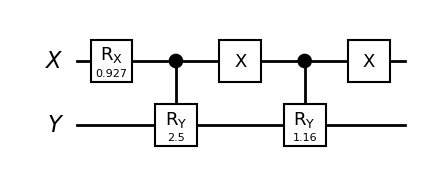

In [48]:
# Define a 2-qubit quantum circuit
qc = QuantumCircuit(qrX, qrY, name="Bayes net small")

#Apply the R_theta_X rotation gate on the first qubit
qc.rx(theta_X, 0)

# Apply the controlled-R_theta_YX rotation gate
qc.cry(theta_YX, control_qubit=qrX, target_qubit=qrY)

# Apply the X gate on the first qubit
qc.x(0)

# Apply the controlled-R_theta_YnX rotation gate
qc.cry(theta_YnX, control_qubit=qrX, target_qubit=qrY)

# Apply another X gate on the first qubit
qc.x(0)

qc.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

# Measure network

In [49]:
# Measure both qubits
qc.measure_all()

# Simulate network

Result of the Quantum Circuit:
{'11': 1869, '10': 2269, '00': 5651, '01': 211}


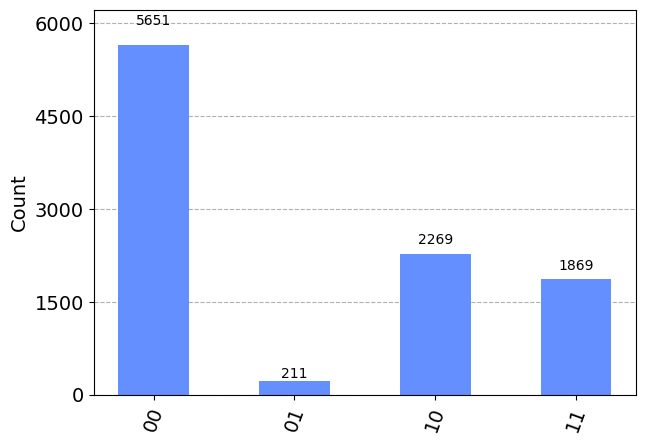

In [50]:
# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=10000).result()
counts = result.get_counts(qc)

# Display the results
print("Result of the Quantum Circuit:")
print(counts)
plot_histogram(counts)